In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("C:/Users/Dell/3D Objects/wfp_food_prices_pakistan.csv")
df.head()

,date,cmname,unit,category,price,currency,country,admname,adm1id,mktname,mktid,cmid,ptid,umid,catid,sn,default
0,#date,#item+name,#item+unit,#item+type,#value,#currency,#country+name,#adm1+name,#adm1+code,#name+market,NaN,#item+code,NaN,NaN,#item+type+code,#meta+id,NaN
1,2004-01-15,Wheat flour - Retail,KG,cereals and tubers,13.0,PKR,Pakistan,Balochistan,2272,Quetta,295.0,58,15.0,5.0,1,295_58_15_5,NaN
2,2004-02-15,Wheat flour - Retail,KG,cereals and tubers,13.0,PKR,Pakistan,Balochistan,2272,Quetta,295.0,58,15.0,5.0,1,295_58_15_5,NaN
3,2004-03-15,Wheat flour - Retail,KG,cereals and tubers,14.25,PKR,Pakistan,Balochistan,2272,Quetta,295.0,58,15.0,5.0,1,295_58_15_5,NaN
4,2004-04-15,Wheat flour - Retail,KG,cereals and tubers,12.5,PKR,Pakistan,Balochistan,2272,Quetta,295.0,58,15.0,5.0,1,295_58_15_5,NaN


In [12]:
# Dropping first row as this contains NAN values
df.drop(df.index[0:1], inplace=True)
df.isna().sum()

date           0
cmname         0
unit           0
category       0
price          0
currency       0
country        0
admname        0
adm1id         0
mktname        0
mktid          0
cmid           0
ptid           0
umid           0
catid          0
sn             0
default     7662
dtype: int64

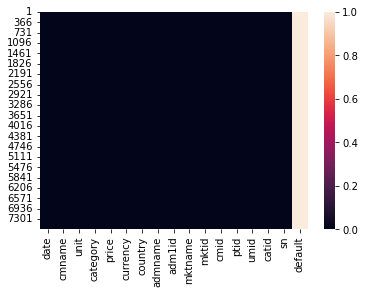

In [13]:
# Heat map to show visually show that there is no NaN value
sns.heatmap(df.isna())
plt.show()

In [14]:
# Converting data column from simple object to Date Time object
df["date"] =  pd.to_datetime(df["date"], format="%Y/%m/%d")

# converting price from object to int
df['price'] = df['price'].astype(str).astype(float)


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7662 entries, 1 to 7662
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      7662 non-null   datetime64[ns]
 1   cmname    7662 non-null   object        
 2   unit      7662 non-null   object        
 3   category  7662 non-null   object        
 4   price     7662 non-null   float64       
 5   currency  7662 non-null   object        
 6   country   7662 non-null   object        
 7   admname   7662 non-null   object        
 8   adm1id    7662 non-null   object        
 9   mktname   7662 non-null   object        
 10  mktid     7662 non-null   float64       
 11  cmid      7662 non-null   object        
 12  ptid      7662 non-null   float64       
 13  umid      7662 non-null   float64       
 14  catid     7662 non-null   object        
 15  sn        7662 non-null   object        
 16  default   0 non-null      float64       
dtypes: datetime64[

In [16]:
df.head()

,date,cmname,unit,category,price,currency,country,admname,adm1id,mktname,mktid,cmid,ptid,umid,catid,sn,default
1,2004-01-15,Wheat flour - Retail,KG,cereals and tubers,13.00,PKR,Pakistan,Balochistan,2272,Quetta,295.0,58,15.0,5.0,1,295_58_15_5,NaN
2,2004-02-15,Wheat flour - Retail,KG,cereals and tubers,13.00,PKR,Pakistan,Balochistan,2272,Quetta,295.0,58,15.0,5.0,1,295_58_15_5,NaN
3,2004-03-15,Wheat flour - Retail,KG,cereals and tubers,14.25,PKR,Pakistan,Balochistan,2272,Quetta,295.0,58,15.0,5.0,1,295_58_15_5,NaN
4,2004-04-15,Wheat flour - Retail,KG,cereals and tubers,12.50,PKR,Pakistan,Balochistan,2272,Quetta,295.0,58,15.0,5.0,1,295_58_15_5,NaN
5,2004-05-15,Wheat flour - Retail,KG,cereals and tubers,13.25,PKR,Pakistan,Balochistan,2272,Quetta,295.0,58,15.0,5.0,1,295_58_15_5,NaN


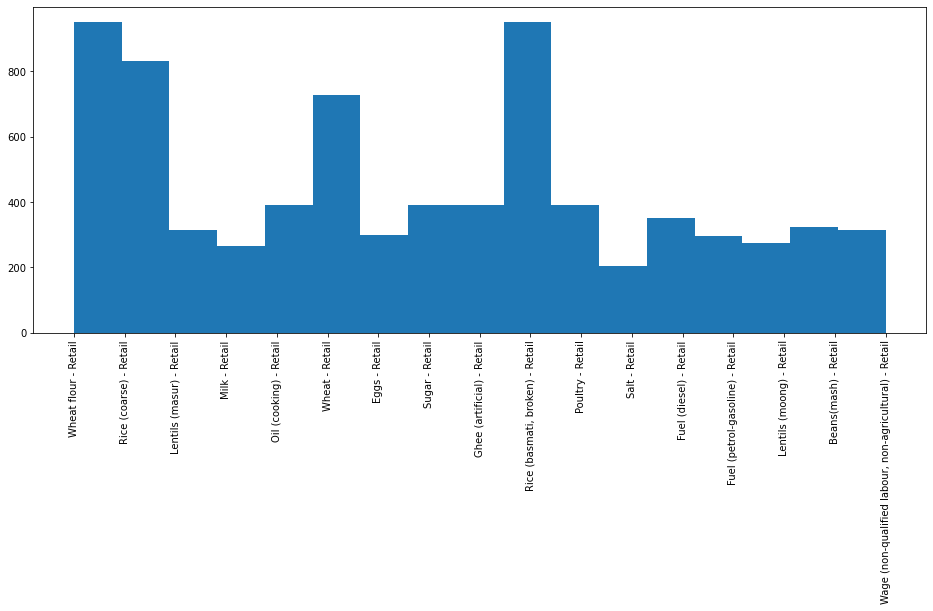

In [21]:
fig, ax = plt.subplots(figsize=(16, 6))
plt.hist(x='cmname', data = df, bins = 17)
plt.xticks(rotation = 90)
plt.show()


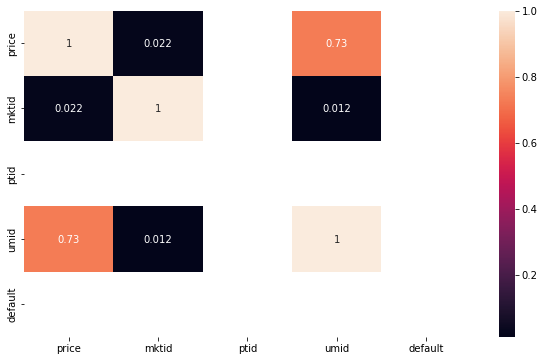

In [22]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(df.corr(), annot = True)
plt.show()

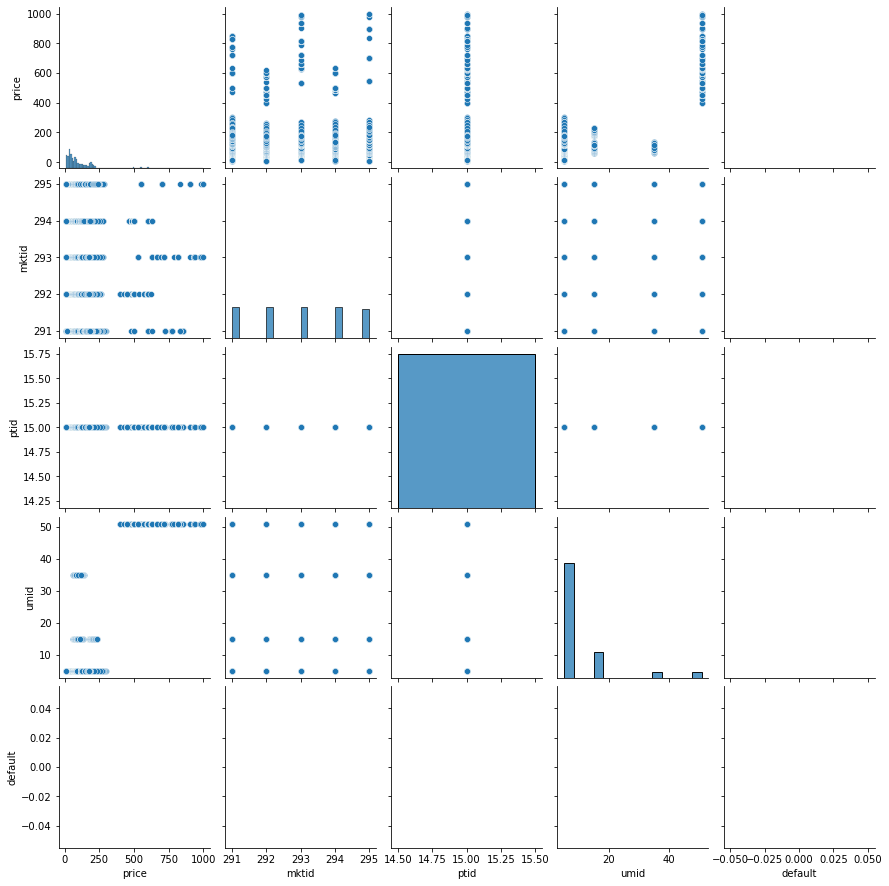

In [23]:
sns.pairplot(df)
plt.show()

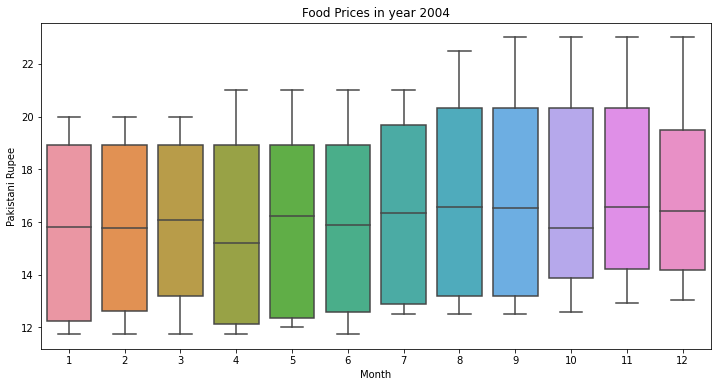

In [36]:
df = df.set_index('date')
df_last_two = df[df.index.year == 2004]
fig, ax = plt.subplots(1, 1, figsize=(12, 6), sharex=True)
sns.boxplot(data = df_last_two, x=df_last_two.index.month, y='price', ax=ax)
ax.set_ylabel("Pakistani Rupee")
ax.set_title('Food Prices in year 2004')
ax.set_xlabel('Month');

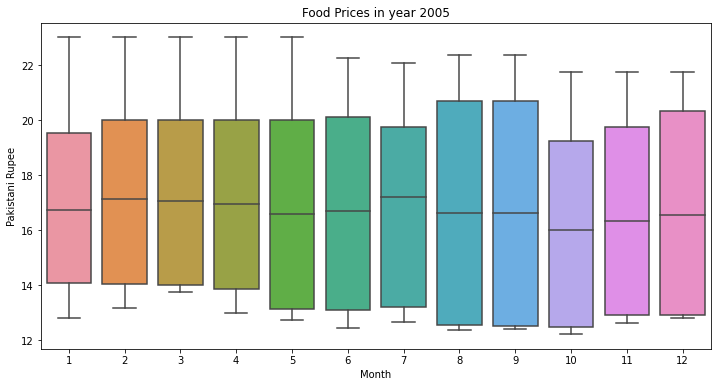

In [37]:

df_last_two = df[df.index.year == 2005]
fig, ax = plt.subplots(1, 1, figsize=(12, 6), sharex=True)
sns.boxplot(data = df_last_two, x=df_last_two.index.month, y='price', ax=ax)
ax.set_ylabel("Pakistani Rupee")
ax.set_title('Food Prices in year 2005')
ax.set_xlabel('Month');


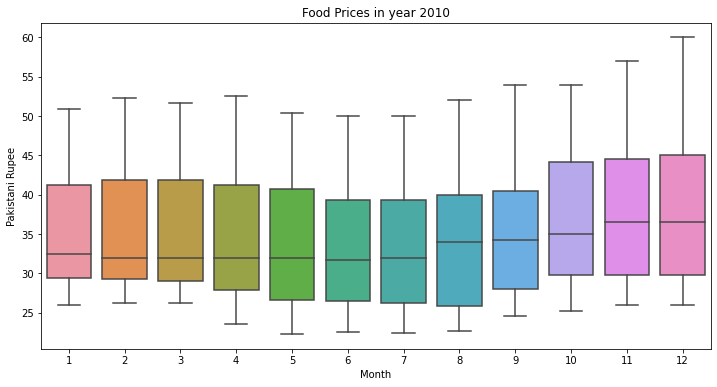

In [38]:

df_last_two = df[df.index.year == 2010]
fig, ax = plt.subplots(1, 1, figsize=(12, 6), sharex=True)
sns.boxplot(data = df_last_two, x=df_last_two.index.month, y='price', ax=ax)
ax.set_ylabel("Pakistani Rupee")
ax.set_title('Food Prices in year 2010')
ax.set_xlabel('Month');


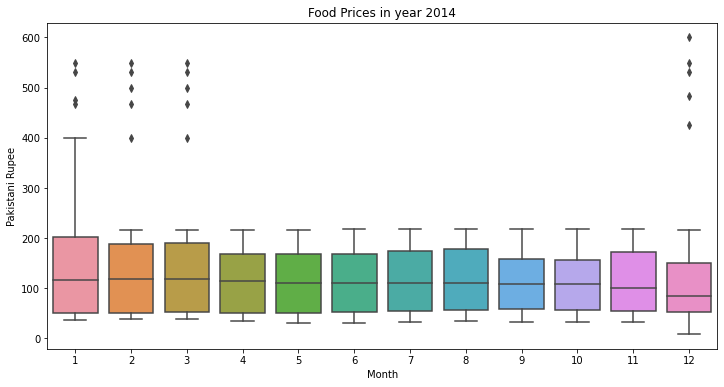

In [39]:

df_last_two = df[df.index.year == 2014]
fig, ax = plt.subplots(1, 1, figsize=(12, 6), sharex=True)
sns.boxplot(data = df_last_two, x=df_last_two.index.month, y='price', ax=ax)
ax.set_ylabel("Pakistani Rupee")
ax.set_title('Food Prices in year 2014')
ax.set_xlabel('Month');


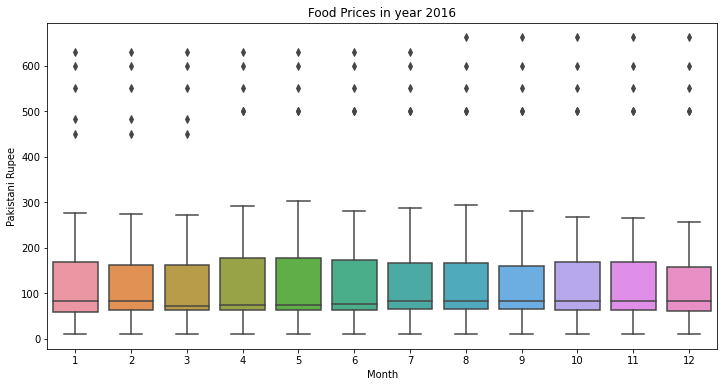

In [40]:

df_last_two = df[df.index.year == 2016]
fig, ax = plt.subplots(1, 1, figsize=(12, 6), sharex=True)
sns.boxplot(data = df_last_two, x=df_last_two.index.month, y='price', ax=ax)
ax.set_ylabel("Pakistani Rupee")
ax.set_title('Food Prices in year 2016')
ax.set_xlabel('Month');


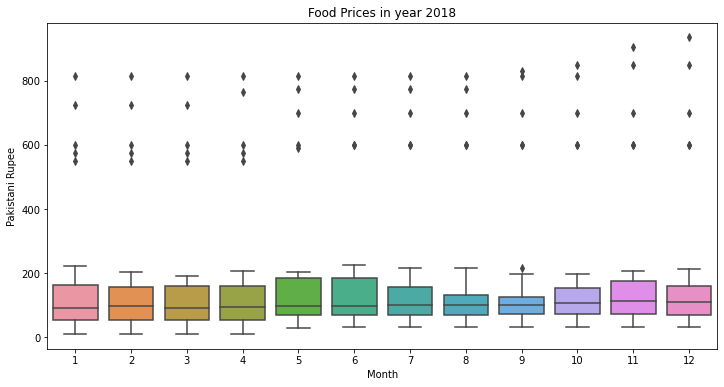

In [41]:

df_last_two = df[df.index.year == 2018]
fig, ax = plt.subplots(1, 1, figsize=(12, 6), sharex=True)
sns.boxplot(data = df_last_two, x=df_last_two.index.month, y='price', ax=ax)
ax.set_ylabel("Pakistani Rupee")
ax.set_title('Food Prices in year 2018')
ax.set_xlabel('Month');


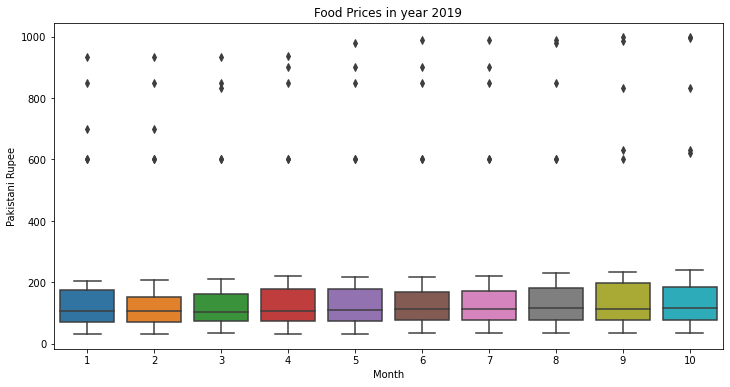

In [42]:

df_last_two = df[df.index.year == 2019]
fig, ax = plt.subplots(1, 1, figsize=(12, 6), sharex=True)
sns.boxplot(data = df_last_two, x=df_last_two.index.month, y='price', ax=ax)
ax.set_ylabel("Pakistani Rupee")
ax.set_title('Food Prices in year 2019')
ax.set_xlabel('Month');


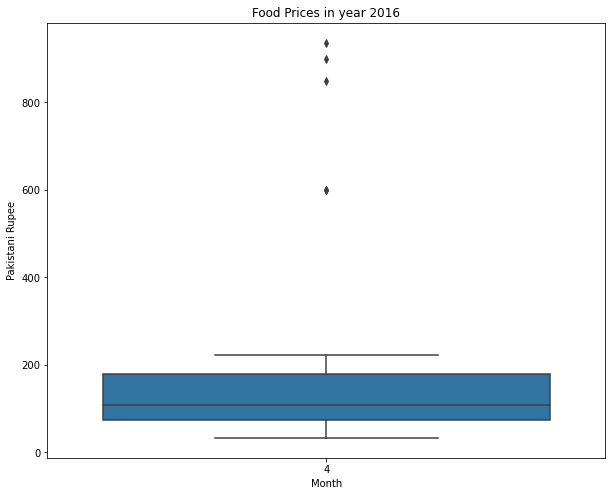

In [43]:
# food price in one month of year 2019
df_last_two = df[(df.index.year == 2019) & (df.index.month == 4)]
fig, ax = plt.subplots(1, 1, figsize=(10, 8), sharex=True)
sns.boxplot(data = df_last_two, x=df_last_two.index.month, y='price', ax=ax)
ax.set_ylabel("Pakistani Rupee")
ax.set_title('Food Prices in year 2016')
ax.set_xlabel('Month');


In [17]:
# Regression models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score
df.columns

Index(['date', 'cmname', 'unit', 'category', 'price', 'currency', 'country',
       'admname', 'adm1id', 'mktname', 'mktid', 'cmid', 'ptid', 'umid',
       'catid', 'sn', 'default'],
      dtype='object')

In [18]:
# label encodding
# Converting categorical values into unique integer values
from sklearn.preprocessing import LabelEncoder
cols = ['cmname', 'unit', 'category', 'currency', 'country', 'admname', 'adm1id', 'mktname', 'cmid', 'catid', 'sn']
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])


In [19]:
df.head()

,date,cmname,unit,category,price,currency,country,admname,adm1id,mktname,mktid,cmid,ptid,umid,catid,sn,default
1,2004-01-15,16,2,0,13.00,0,0,0,0,4,295.0,9,15.0,5.0,0,77,NaN
2,2004-02-15,16,2,0,13.00,0,0,0,0,4,295.0,9,15.0,5.0,0,77,NaN
3,2004-03-15,16,2,0,14.25,0,0,0,0,4,295.0,9,15.0,5.0,0,77,NaN
4,2004-04-15,16,2,0,12.50,0,0,0,0,4,295.0,9,15.0,5.0,0,77,NaN
5,2004-05-15,16,2,0,13.25,0,0,0,0,4,295.0,9,15.0,5.0,0,77,NaN


In [20]:
#  splitting data into test and train set
from sklearn.model_selection import train_test_split
x = df[['cmname', 'unit', 'category', 'price', 'currency', 'country',
       'admname', 'adm1id', 'mktname', 'mktid', 'cmid', 'ptid', 'umid',
       'catid', 'sn']]
y = df['price']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 42)

Train Set Accuracy:100.0
Test Set Accuracy:100.0


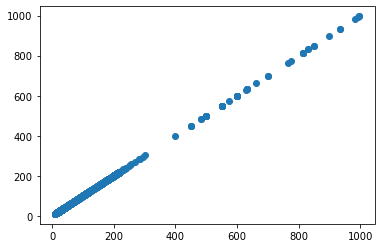

In [68]:
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)
y_pred = lin_reg.predict(x_test)

lin_acc=r2_score(y_test,lin_reg.predict(x_test))

print("Train Set Accuracy:"+str(r2_score(y_train,lin_reg.predict(x_train))*100))
print("Test Set Accuracy:"+str(r2_score(y_test,lin_reg.predict(x_test))*100))

plt.scatter(y_test,y_pred)
plt.show()


Train Set Accuracy:100.0
Test Set Accuracy:99.99833732328418


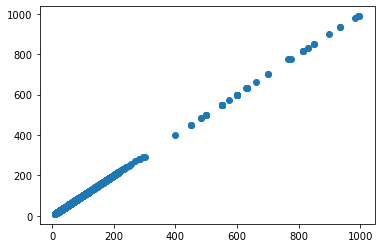

In [69]:
d_reg = DecisionTreeRegressor()
d_reg.fit(x_train,y_train)
y_pred = d_reg.predict(x_test)

d_acc=r2_score(y_test,d_reg.predict(x_test))

print("Train Set Accuracy:"+str(r2_score(y_train,d_reg.predict(x_train))*100))
print("Test Set Accuracy:"+str(r2_score(y_test,d_reg.predict(x_test))*100))

plt.scatter(y_test,y_pred)
plt.show()

Train Set Accuracy:99.99962179758903
Test Set Accuracy:99.99764271354609


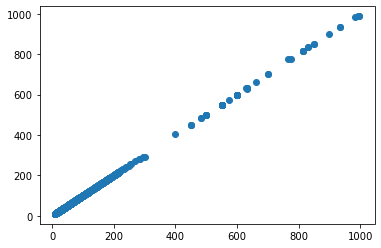

In [70]:
r_reg = RandomForestRegressor()
r_reg.fit(x_train,y_train)
y_pred = r_reg.predict(x_test)

r_acc=r2_score(y_test,r_reg.predict(x_test))

print("Train Set Accuracy:"+str(r2_score(y_train,r_reg.predict(x_train))*100))
print("Test Set Accuracy:"+str(r2_score(y_test,r_reg.predict(x_test))*100))

plt.scatter(y_test,y_pred)
plt.show()

Train Set Accuracy:99.99057765039147
Test Set Accuracy:99.98497960290051


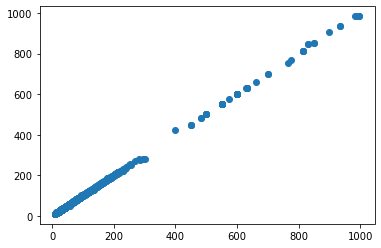

In [71]:
k_reg = KNeighborsRegressor()
k_reg.fit(x_train,y_train)
y_pred = k_reg.predict(x_test)

k_acc=r2_score(y_test,k_reg.predict(x_test))

print("Train Set Accuracy:"+str(r2_score(y_train,k_reg.predict(x_train))*100))
print("Test Set Accuracy:"+str(r2_score(y_test,k_reg.predict(x_test))*100))

plt.scatter(y_test,y_pred)
plt.show()

Train Set Accuracy:82.56598284751767
Test Set Accuracy:76.48190859938153


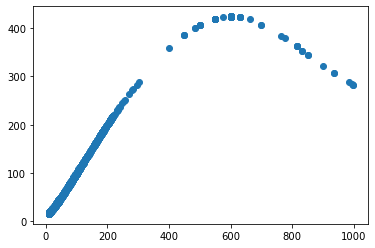

In [72]:
s_reg = SVR()
s_reg.fit(x_train,y_train)
y_pred = s_reg.predict(x_test)

s_acc=r2_score(y_test,s_reg.predict(x_test))

print("Train Set Accuracy:"+str(r2_score(y_train,s_reg.predict(x_train))*100))
print("Test Set Accuracy:"+str(r2_score(y_test,s_reg.predict(x_test))*100))

plt.scatter(y_test,y_pred)
plt.show()

Mean squared error on test set 8.438198872212071e-05
     Columns  Coefficient Estimate
0     cmname             -0.000000
1       unit             -0.000000
2   category              0.000000
3      price              0.999932
4   currency              0.000000
5    country              0.000000
6    admname             -0.000000
7     adm1id             -0.000000
8    mktname              0.000000
9      mktid              0.000000
10      cmid             -0.000000
11      ptid              0.000000
12      umid              0.000000
13     catid              0.000000
14        sn             -0.000000
Train Set Accuracy:99.99999953950656
Test Set Accuracy:99.99999953880227


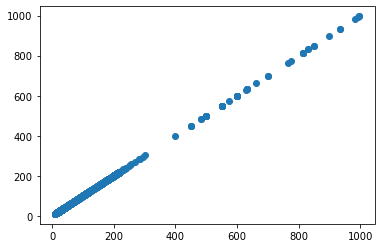

In [73]:
# import Lasso regression from sklearn library
from sklearn.linear_model import Lasso

# model training
Lasso_regression = Lasso(alpha = 1)
Lasso_regression.fit(x_train, y_train)
y_pred1 = Lasso_regression.predict(x_test)

#  Mean Squared Error
mean_squared_error = np.mean((y_pred1 - y_test)**2)
print("Mean squared error on test set", mean_squared_error)
lasso_coeff = pd.DataFrame()
lasso_coeff["Columns"] = x_train.columns
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_)

print(lasso_coeff)


Lasso_regression_acc=r2_score(y_test,Lasso_regression.predict(x_test))

print("Train Set Accuracy:"+str(r2_score(y_train,Lasso_regression.predict(x_train))*100))
print("Test Set Accuracy:"+str(r2_score(y_test,Lasso_regression.predict(x_test))*100))

plt.scatter(y_test,y_pred1)
plt.show()

1.247511534462451e-11
     Columns  Coefficient Estimate
0     cmname          6.499532e-07
1       unit         -1.502953e-06
2   category          2.842500e-06
3      price          9.999999e-01
4   currency          0.000000e+00
5    country          0.000000e+00
6    admname         -3.937891e-07
7     adm1id         -3.937891e-07
8    mktname         -7.076366e-07
9      mktid          2.833943e-08
10      cmid         -4.769637e-07
11      ptid          0.000000e+00
12      umid          5.222747e-07
13     catid         -1.044428e-06
14        sn          4.502897e-09
Train Set Accuracy:99.99999999999993
Test Set Accuracy:99.99999999999993


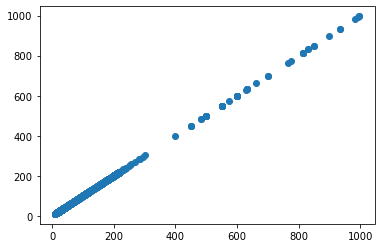

In [74]:
# import ridge_regression 
from sklearn.linear_model import Ridge

# Train the model
ridge_regression = Ridge(alpha = 1)
ridge_regression.fit(x_train, y_train)
y_pred = ridge_regression.predict(x_test)

# mean square error
mean_squared_error_ridge = np.mean((y_pred - y_test)**2)
print(mean_squared_error_ridge)

# ridge coefficient
ridge_coefficient = pd.DataFrame()
ridge_coefficient["Columns"]= x_train.columns
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_)
print(ridge_coefficient)


ridge_regression_acc=r2_score(y_test,ridge_regression.predict(x_test))

print("Train Set Accuracy:"+str(r2_score(y_train,ridge_regression.predict(x_train))*100))
print("Test Set Accuracy:"+str(r2_score(y_test,ridge_regression.predict(x_test))*100))

plt.scatter(y_test,y_pred)
plt.show()


In [66]:
models = pd.DataFrame({
    'Model': ['Linear regression','Decision tree regression','RandomForestRegressor','KNeighborsRegressor','SVR', 'ridge regression', 'Lasso regression'],
    'Score': [ lin_acc,d_acc, r_acc, k_acc, s_acc, ridge_regression_acc, Lasso_regression_acc]
})

# sorting values in descending order
models.sort_values(by = 'Score', ascending = False)

,Model,Score
0,Linear regression,1.000000
3,KNeighborsRegressor,1.000000
5,ridge regression,1.000000
6,Lasso regression,1.000000
1,Decision tree regression,0.999984
2,RandomForestRegressor,0.999973
4,SVR,0.764819


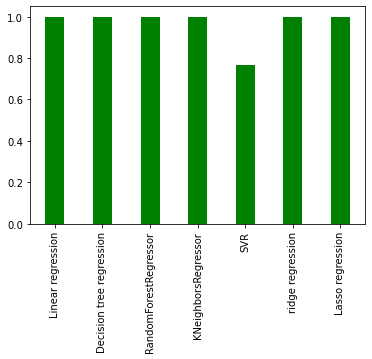

In [67]:
plt.bar(models.Model, models.Score,width = 0.4, color = 'green')
plt.xticks(rotation = 90)
plt.show()